<center><img style="align: center;"  src="https://raw.githubusercontent.com/lrojasmendoza/GraduateProjectE29/master/Images/Slide1.jpg"> </center>

<center><img style="align: center;"  src="https://raw.githubusercontent.com/lrojasmendoza/GraduateProjectE29/master/Images/Slide2.JPG"> </center

<center><img style="align: center;"  src="https://raw.githubusercontent.com/lrojasmendoza/GraduateProjectE29/master/Images/Slide3.jpg"> </center

<center><img style="align: center;"  src="https://raw.githubusercontent.com/lrojasmendoza/GraduateProjectE29/master/Images/Slide4.JPG"> </center

In [1]:
#Let's start with the usual imports
import pandas as pd
import numpy as np


#Let's import the required libraries for web scraping
from bs4 import BeautifulSoup
import requests
import os
import urllib.parse

#Maplotlib and seaborn for creating plots 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Finally some metrics from sklearn.
from sklearn.metrics import accuracy_score, confusion_matrix

<center><img style="align: center;"  src="https://raw.githubusercontent.com/lrojasmendoza/GraduateProjectE29/master/Images/Slide5.JPG"> </center



## Web Scraping using BeautifulSoup 
* For each match in the worldcups from 1994 to 2014 we want to obtain the following information:
    * 'Team_home' and 'Team visitor;
    * Score of the match 
    * Phase/Stage at which the match took place
    * Date at which the game took place
    * Worldcup at which the game took place
    
* For each FIFA Team as of 2018:   
    * Ranking, MP, W, D,L

<center><img style="align: center;"  src="https://raw.githubusercontent.com/lrojasmendoza/GraduateProjectE29/master/Images/Slide6.JPG"> </center



<center><img style="align: center;"  src="https://raw.githubusercontent.com/lrojasmendoza/GraduateProjectE29/master/Images/Slide7.JPG"> </center


In [2]:
%%time

#For doing so firts we need the links for the matches of each worldcup
links=["http://www.fifa.com/worldcup/archive/brazil2014/matches/index.html", "http://www.fifa.com/worldcup/archive/southafrica2010/matches/index.html",
       "http://www.fifa.com/worldcup/archive/germany2006/matches/index.html","http://www.fifa.com/worldcup/archive/koreajapan2002/matches/index.html",
        "http://www.fifa.com/worldcup/archive/france1998/matches/index.html","http://www.fifa.com/worldcup/archive/usa1994/matches/index.html"]
          
i=0
for link in links:

    #Firts we use the library request to extract the information from the website
    page = requests.get(link)
    
    #Then we create a BeautifulSoup object 
    soup = BeautifulSoup(page.content, 'html.parser')
    
    #Finally, we parse through the HTML document source code
    #The data for all matches is stored in the class 'matches'
    #Each particular match is stored in a class called "col-xs-12 clear-grid"
    matches_= soup.find(class_="matches")
    matches=matches_.find_all(class_="col-xs-12 clear-grid ")

    #Finally for each beautiful soup element, we search for each element of interest based on their specific class.
    #For instance 'Scores' are stored under the class "s-scoreText". 
    #Please notice that we use the method getText() to obtain plane text.
    overall_results=[]
    for match in matches:
            results = {}
            results['Team_home']=match.find(class_='t home').find(class_=lambda x: x and x.startswith('t-nText')).getText()
            results['Team_home_short']=match.find(class_='t home').find(class_='t-nTri').getText()
            results['Team_visitor']=match.find(class_='t away').find(class_=lambda x: x and x.startswith('t-nText')).getText()
            results['Team_visitor_short']=match.find(class_='t away').find(class_='t-nTri').getText()
            results['Score']=match.find(class_="s-scoreText").getText()
            results['Phase']=match.find(class_="mu-i-group").getText()
            results['Date']=match.find(class_="mu-i-datetime").getText()
            results['World_Cup']=soup.find(class_="header-wrap contentheader").find('a').getText()
            try:
                results['Reason_win']=match.find(class_="text-reasonwin").getText()
            except:
                pass
                
            overall_results.append(results)

    df_2= pd.DataFrame(overall_results)  
    i=i+1
    if i>1:
        new_df_2=pd.concat([prior_df_2,df_2], ignore_index = True)
        prior_df_2=new_df_2
    else:
        prior_df_2=df_2


worldcup_games=new_df_2.copy()

#Some parts of my code are based on the following stackoverflow discussion
#https://stackoverflow.com/questions/35465182/how-to-find-all-divs-whos-class-starts-with-a-string-in-beautifulsoup

Wall time: 8.31 s


In [3]:
#So we have gotten all the matches from 1994 to 2014. 
worldcup_games.head(15)


,Date,Phase,Reason_win,Score,Team_home,Team_home_short,Team_visitor,Team_visitor_short,World_Cup
0,12 Jun 2014 - 17:00 Local time,Group A,,3-1,Brazil,BRA,Croatia,CRO,2014 FIFA World Cup Brazil™12 June - 13 July
1,13 Jun 2014 - 13:00 Local time,Group A,,1-0,Mexico,MEX,Cameroon,CMR,2014 FIFA World Cup Brazil™12 June - 13 July
2,13 Jun 2014 - 16:00 Local time,Group B,,1-5,Spain,ESP,Netherlands,NED,2014 FIFA World Cup Brazil™12 June - 13 July
3,13 Jun 2014 - 18:00 Local time,Group B,,3-1,Chile,CHI,Australia,AUS,2014 FIFA World Cup Brazil™12 June - 13 July
4,14 Jun 2014 - 13:00 Local time,Group C,,3-0,Colombia,COL,Greece,GRE,2014 FIFA World Cup Brazil™12 June - 13 July
5,14 Jun 2014 - 16:00 Local time,Group D,,1-3,Uruguay,URU,Costa Rica,CRC,2014 FIFA World Cup Brazil™12 June - 13 July
6,14 Jun 2014 - 18:00 Local time,Group D,,1-2,England,ENG,Italy,ITA,2014 FIFA World Cup Brazil™12 June - 13 July
7,14 Jun 2014 - 22:00 Local time,Group C,,2-1,Côte d'Ivoire,CIV,Japan,JPN,2014 FIFA World Cup Brazil™12 June - 13 July
8,15 Jun 2014 - 13:00 Local time,Group E,,2-1,Switzerland,SUI,Ecuador,ECU,2014 FIFA World Cup Brazil™12 June - 13 July
9,15 Jun 2014 - 16:00 Local time,Group E,,3-0,France,FRA,Honduras,HON,2014 FIFA World Cup Brazil™12 June - 13 July


<center><img style="align: center;"  src="https://raw.githubusercontent.com/lrojasmendoza/GraduateProjectE29/master/Images/Slide8.JPG"> </center


<center><img style="align: center;"  src="https://raw.githubusercontent.com/lrojasmendoza/GraduateProjectE29/master/Images/sliderankings.jpg"> </center

In [4]:
#Similarly as we did before, we are going to iterate over this website to extract the rankings for 2018 
#But most importantly to extract the links that contain historical data for each FIFA Team.
page_1 = requests.get("http://www.fifa.com/fifa-world-ranking/ranking-table/men/")
soup = BeautifulSoup(page_1.content, 'html.parser')
table = soup.find(class_='table tbl-ranking table-striped')


#Let's get the column_headers
column_headers = [th.getText() for th in 
                  table.findAll('tr')[0].findAll('th')]

#Let's get the information contained in each row
data_rows = table.findAll('tr')[1:]  # skip the first 2 header rows
play_data = [[td.getText() for td in data_rows[i]]
           for i in range(len(data_rows))]


#Finally let's get the urls for each team.
urls= [[row.find(class_='tbl-teamname').getText(), row.find('a')['href']] for row in data_rows]


rankings_2018 = pd.DataFrame(play_data, columns=column_headers)

rankings_2018.head()

,,Rank,Team,,,Total Points,Previous Points,+/-,Positions,Avg.,AVG WGT,Avg.,AVG WGT,Avg.,AVG WGT,Avg.,AVG WGT,,,
0,,1,Germany,0,GER,1533(1532.68),1609,0,,784.89,784.89,804.19,402.09,463.51,139.05,1033.19,206.64,,,UEFA
1,,2,Brazil,0,BRA,1384(1384.24),1489,0,,560.52,560.52,990.59,495.29,565.90,169.77,793.26,158.65,,,CONMEBOL
2,,3,Belgium,0,BEL,1346(1345.65),1337,2,,684.48,684.48,594.99,297.50,592.33,177.70,929.90,185.98,,,UEFA
3,,4,Portugal,0,POR,1306(1306.35),1360,-1,,687.22,687.22,658.47,329.23,576.48,172.94,584.73,116.95,,,UEFA
4,,5,Argentina,0,ARG,1254(1253.61),1359,-1,,418.94,418.94,839.74,419.87,769.42,230.83,919.87,183.97,,,CONMEBOL


In [5]:
#Let's print the numbre of urls, which corresponds to the number of FIFA teams as of 2018
print(len(urls))
display(urls[0:5])


211


[['Germany',
  '/fifa-world-ranking/associations/association=ger/men/index.html'],
 ['Brazil', '/fifa-world-ranking/associations/association=bra/men/index.html'],
 ['Belgium',
  '/fifa-world-ranking/associations/association=bel/men/index.html'],
 ['Portugal',
  '/fifa-world-ranking/associations/association=por/men/index.html'],
 ['Argentina',
  '/fifa-world-ranking/associations/association=arg/men/index.html']]

In [6]:
%%time

#The following routine will extract historical rankings and statistics for each of the 211 FIFA teams
#and it will store all the data in one dataframe. 
i=0
for url in urls :
    
    ranking_link=url[0]
    ranking_url=urllib.parse.urljoin("http://www.fifa.com", url[1])
    page = requests.get(ranking_url)
    soup = BeautifulSoup(page.content, 'html.parser')
    table= soup.find_all(class_='table tbl-ranking table-striped')[1]
    column_headers= [th.getText() for th in 
                    table.findAll('tr')[0].findAll('th')]
    data_rows= table.findAll('tr')[1:] 
    play_data= [[td.getText() for td in data_rows[i]]
           for i in range(len(data_rows))]

    df_url = pd.DataFrame(play_data, columns=column_headers)
    df_url['Team']=url[0]
    
    i=i+1
    if i>1:
        new_df=pd.concat([prior_df,df_url], ignore_index = True)
        prior_df=new_df
    else:
        prior_df=df_url   
        
hist_data=new_df.copy()

Wall time: 2min 28s


In [7]:
hist_data.head(10)


,,Rank,Date,Month,MP,W,L,D,Best Ranking,Worst Ranking,Best move,Worst move,Team
0,,1,2018,April,2,0,1,1,-,-,-,-,Germany
1,,1,2018,March,0,0,0,0,-,-,-,-,Germany
2,,1,2018,February,0,0,0,0,-,-,-,-,Germany
3,,1,2018,January,0,0,0,0,-,-,-,-,Germany
4,,1,2017,-,15,11,0,4,1,3,+2 (July),-1 (August),Germany
5,,3,2016,-,16,10,3,3,2,5,+1 (June),-1 (April),Germany
6,,4,2015,-,8,4,3,1,1,4,+1 (October),-2 (December),Germany
7,,1,2014,-,16,10,2,4,1,2,+1 (July),0 (August),Germany
8,,2,2013,-,12,9,1,2,2,3,+1 (October),-1 (September),Germany
9,,2,2012,-,14,8,4,2,2,3,+1 (February),-1 (March),Germany


## Data Cleaning /Preparation

<hr class="red">

Data cleaning and preparation is neccesary for the next two dataframes: 

* hist_data dataframe  


* worldcup_games dataframe

In [8]:
#Let's extract the best ranking and worst ranking for 2018 and add it to the month of april. 
#Please keep in mind that once FIFA realeases the rankings for the month of May, we will need to change 'April' for 'May' in
#the 'code below'
for Team in hist_data['Team'].unique():
    
    hist_data.loc[(hist_data['Date']=='2018') & (hist_data['Month']=='April')&(hist_data['Team']==Team),'Best Ranking']= \
    hist_data[(hist_data['Date']=='2018') & (hist_data['Team']==Team)]['Rank'].max()
    
    hist_data.loc[(hist_data['Date']=='2018') & (hist_data['Month']=='April')&(hist_data['Team']==Team),'Worst Ranking']=  \
    hist_data[(hist_data['Date']=='2018') & (hist_data['Team']==Team)]['Rank'].min()

In [9]:
#Here we can see that we have added the best and worst ranking of 2018 to the last month (i.e, april)
hist_data.head()

,,Rank,Date,Month,MP,W,L,D,Best Ranking,Worst Ranking,Best move,Worst move,Team
0,,1,2018,April,2,0,1,1,1,1,-,-,Germany
1,,1,2018,March,0,0,0,0,-,-,-,-,Germany
2,,1,2018,February,0,0,0,0,-,-,-,-,Germany
3,,1,2018,January,0,0,0,0,-,-,-,-,Germany
4,,1,2017,-,15,11,0,4,1,3,+2 (July),-1 (August),Germany


In [10]:
#Let's get rid of the columns Best move, Worst Move, 
try:
    hist_data.drop(['Month','Best move', 'Worst move'], inplace=True , axis=1)
except:
    pass

#Now let's get rid of duplicates by 'Dat'e and 'Team' keeping the firts entrance. This way we only keep the data stored
# in april 2018 for each team
hist_data=hist_data.drop_duplicates(subset=['Date','Team'], keep='first').reset_index(drop=True)

#Let's convert our columns to numeric whenever is possible
for name in hist_data.columns:
    hist_data[name] = pd.to_numeric(hist_data[name],errors="ignore")
    
#Finally, Let's create two new columns:
hist_data['Win_percentage']=hist_data.apply(lambda row:((row['W']/row['MP']) if row['MP']!=0 else 0), axis=1)
hist_data['Draw_percentage']=hist_data.apply(lambda row:(((row['D'])/row['MP']) if row['MP']!=0 else 0), axis=1)

In [11]:
display(hist_data.head(10))


,,Rank,Date,MP,W,L,D,Best Ranking,Worst Ranking,Team,Win_percentage,Draw_percentage
0,,1,2018,2,0,1,1,1,1,Germany,0.000000,0.500000
1,,1,2017,15,11,0,4,1,3,Germany,0.733333,0.266667
2,,3,2016,16,10,3,3,2,5,Germany,0.625000,0.187500
3,,4,2015,8,4,3,1,1,4,Germany,0.500000,0.125000
4,,1,2014,16,10,2,4,1,2,Germany,0.625000,0.250000
5,,2,2013,12,9,1,2,2,3,Germany,0.750000,0.166667
6,,2,2012,14,8,4,2,2,3,Germany,0.571429,0.142857
7,,3,2011,13,9,1,3,3,4,Germany,0.692308,0.230769
8,,3,2010,17,12,3,2,3,6,Germany,0.705882,0.117647
9,,6,2009,11,7,1,3,2,6,Germany,0.636364,0.272727


In [12]:
#Let's save the data we have so far:
hist_data.to_csv('historic_data_180501.csv')

## Data cleaning for worldcup_games dataframe:
The following steps will be taken to clean/prepare the data contained in the columns of worldcup_games dataframe

   * Extract penalties scores from the column 'Reason win'
   * Extract the Team_home and Team_visitor scores from the column 'Score'
   * Simplify the information contained in the columns 'Date' and 'Worldcup'
   * Take care of countries that have dissapeared, been created or that have simply changed their names since 1994.
   * Create two columns containing the outcome of each game with and without considering penalties.

In [13]:
#Let's take a look at our data:
#Notice that we have the scores of the penalties stored in the column 'Reason Win'
worldcup_games[worldcup_games['Reason_win']!=" "].head(2)


,Date,Phase,Reason_win,Score,Team_home,Team_home_short,Team_visitor,Team_visitor_short,World_Cup
48,28 Jun 2014 - 13:00 Local time,Round of 16,Brazil win on penalties (3 - 2),1-1,Brazil,BRA,Chile,CHI,2014 FIFA World Cup Brazil™12 June - 13 July
51,29 Jun 2014 - 17:00 Local time,Round of 16,Costa Rica win on penalties (5 - 3),1-1,Costa Rica,CRC,Greece,GRE,2014 FIFA World Cup Brazil™12 June - 13 July


In [14]:
#Let's start by extracting some valuable information from the column 'Reason_win'

#First lets find the penalties scores. The scores are in parenthesis and separated by "-"
try:
    worldcup_games.loc[worldcup_games['Reason_win']==" ",['Reason_win']]= \
    worldcup_games.loc[new_df_2['Reason_win']==" ",['Reason_win']].apply(lambda x: x.replace(' ', '-'))
except:
    pass

#Now let's store the results in three new columns: "Penalties", "Team_home_penalties_scores" and "Team_visitor_penalties_score"
try:
    worldcup_games['Penalties']=worldcup_games.loc[:,'Reason_win'].apply(lambda x:x[x.find("("):x.find(")")+1])
    worldcup_games['Team_home_penalties_score']=worldcup_games.loc[:,'Penalties'].apply(lambda x:(x.strip('()').split(' - ')[0]) if x!="" else 0)
    worldcup_games['Team_visitor_penalties_score']=worldcup_games.loc[:,'Penalties'].apply(lambda x:(x.strip('()').split(' - ')[1]) if x!="" else 0)
except:
    pass
    
#Let's drop the columns that are not needed anyumore: 'Penalties' and 'Reason_win'
try:
    worldcup_games.drop(['Penalties','Reason_win'], inplace=True , axis=1)
except:
    pass

In [15]:
#let's take a look at the new columns.
worldcup_games[worldcup_games['Team_home_penalties_score']!=0].head(2)

,Date,Phase,Score,Team_home,Team_home_short,Team_visitor,Team_visitor_short,World_Cup,Team_home_penalties_score,Team_visitor_penalties_score
48,28 Jun 2014 - 13:00 Local time,Round of 16,1-1,Brazil,BRA,Chile,CHI,2014 FIFA World Cup Brazil™12 June - 13 July,3,2
51,29 Jun 2014 - 17:00 Local time,Round of 16,1-1,Costa Rica,CRC,Greece,GRE,2014 FIFA World Cup Brazil™12 June - 13 July,5,3


In [16]:
#Let's now split the scores into two new columns 
try:
    worldcup_games['Team_home_score']=worldcup_games.loc[:,'Score'].apply(lambda x:x.split('-')[0])
    worldcup_games['Team_visitor_score']=worldcup_games.loc[:,'Score'].apply(lambda x:x.split('-')[1])
except:
    pass

#let's drop the column 'Score'
try:
    worldcup_games.drop(['Score'], inplace=True , axis=1)
except:
    pass

In [17]:
#And finally, let's take care of the column 'Date'
#We need to apply right strip on the string 'Local Time'
worldcup_games.loc[:,'Date']=worldcup_games.loc[:,'Date'].apply(lambda x:x.rstrip('Local time'))

#Then we change the format and only extract year, month and day.
worldcup_games.loc[:,'Date']=worldcup_games.loc[:,'Date'].apply(lambda x:pd.to_datetime(x))
worldcup_games.loc[:,'Date']=worldcup_games.loc[:,'Date'].apply(lambda x:(str(x.year)+'-'+str(x.month)+'-'+str(x.day)))
worldcup_games.loc[:,'Date']=worldcup_games.loc[:,'Date'].apply(lambda x:pd.to_datetime(x))


In [18]:
#Now let's simplify the information in the 'World_cup' columns
worldcup_games['World_Cup']=\
worldcup_games.loc[:,'World_Cup'].apply(lambda x:(x[x.find('Cup')+4:x.find('™')].replace(" ","")+"-"+x[:4]))['World_Cup']=\
worldcup_games.loc[:,'World_Cup'].apply(lambda x:(x[x.find('Cup')+4:x.find('™')].replace(" ","")+"-"+x[:4]))


## Time to be politically correct (or incorrect) 

In [19]:
#let's take care of Russia and the Soviet Union
#Russia inherited the FIFA spot from the sovietic union
worldcup_games.loc[worldcup_games['Team_home'].str.contains("Soviet", na=False),'Team_home']='Russia'
worldcup_games.loc[worldcup_games['Team_home_short'].str.contains("URS", na=False),'Team_home_short']='RUS'
worldcup_games.loc[worldcup_games['Team_visitor'].str.contains("Soviet", na=False),'Team_visitor']='Russia'
worldcup_games.loc[worldcup_games['Team_visitor_short'].str.contains("URS", na=False),'Team_visitor_short'] = 'RUS'


#let's take care of Iran 
worldcup_games.loc[new_df_2['Team_home'].str.contains("Iran", na=False),'Team_home']='IR Iran'
worldcup_games.loc[new_df_2['Team_visitor'].str.contains("Iran", na=False),'Team_visitor']='IR Iran'


In [20]:

#let's take care of Germany:
worldcup_games.loc[worldcup_games['Team_home'].str.contains("Germany FR", na=False),'Team_home']='Germany'
worldcup_games.loc[worldcup_games['Team_home_short'].str.contains("FRG", na=False),'Team_home_short']='GER'
worldcup_games.loc[worldcup_games['Team_visitor'].str.contains("Germany FR", na=False),'Team_visitor']='Germany'
worldcup_games.loc[worldcup_games['Team_visitor_short'].str.contains("FRG", na=False),'Team_visitor_short'] = 'GER'


#Let's finally take care of 'Czechoslovakia'
#Czech republick inherited the FIFA spot from Czechoslovakia
worldcup_games.loc[worldcup_games['Team_home'].str.contains("Czechoslovakia", na=False),'Team_home']='Czech Republic'
worldcup_games.loc[worldcup_games['Team_home_short'].str.contains("TCH", na=False),'Team_home_short']='CZE'
worldcup_games.loc[worldcup_games['Team_visitor'].str.contains("Czechoslovakia", na=False),'Team_visitor']='Czech Republic'
worldcup_games.loc[worldcup_games['Team_visitor_short'].str.contains("TCH", na=False),'Team_visitor_short'] = 'CZE'


In [21]:
#Let's deal with Yugoslavia and all the countries that came after it. 
#I decided not to include any games from Yugoslavia as it was difficult to decide to what modern team to allocate the 
#games from the former Yugoslavia. 
mask_1=((worldcup_games['Team_home']=='Yugoslavia')|(worldcup_games['Team_home']=='Serbia and Montenegro'))
mask_2=((worldcup_games['Team_visitor']=='Yugoslavia')|(worldcup_games['Team_visitor']=='Serbia and Montenegro'))

worldcup_games = worldcup_games.drop(worldcup_games[mask_1].index)
worldcup_games = worldcup_games.drop(worldcup_games[mask_2].index)
worldcup_games=worldcup_games.reset_index(drop=True)


C:\Users\lmendoza\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [22]:
#Let's convert to numeric the columns containing scores.
for name in worldcup_games.columns[1:]:
    worldcup_games[name] = pd.to_numeric(worldcup_games[name],errors="ignore")

worldcup_games.dtypes

Date                            datetime64[ns]
Phase                                   object
Team_home                               object
Team_home_short                         object
Team_visitor                            object
Team_visitor_short                      object
World_Cup                               object
Team_home_penalties_score                int64
Team_visitor_penalties_score             int64
Team_home_score                          int64
Team_visitor_score                       int64
dtype: object

In [23]:
#Finally Let's create a column that contains whether the outcome was win, lost or draw.
#Please notice that we are not considering the penalties for this column
worldcup_games['Result']=\
worldcup_games.apply(lambda row: ('Win' if (row['Team_home_score']>row['Team_visitor_score']) else \
                            'Draw' if (row['Team_home_score']==row['Team_visitor_score']) else 'Loss'), axis=1)


#Let's do the same but this time considering penalties.
worldcup_games['Result_with_penalties']=\
worldcup_games.apply(lambda row: ('Win' if ((row['Team_home_score']+row['Team_home_penalties_score'])>(row['Team_visitor_score']+row['Team_visitor_penalties_score'])) else \
                            'Draw' if ((row['Team_home_score']+row['Team_home_penalties_score'])==(row['Team_visitor_score']+row['Team_visitor_penalties_score'])) else 'Loss'), axis=1)


#We won't be using the 'Result_with_penalties' columns in our ML prediction as it resulted in lower performance. 
#Predicting the score of a game based  on penalties is more challenging and it wold require 
#the generation of new features. This is future work and out of the scope for this project. 

In [24]:
#Let's take a look at our dataframe after data cleaning have been completed. 
worldcup_games.head(10)


,Date,Phase,Team_home,Team_home_short,Team_visitor,Team_visitor_short,World_Cup,Team_home_penalties_score,Team_visitor_penalties_score,Team_home_score,Team_visitor_score,Result,Result_with_penalties
0,2014-06-12,Group A,Brazil,BRA,Croatia,CRO,Brazil-2014,0,0,3,1,Win,Win
1,2014-06-13,Group A,Mexico,MEX,Cameroon,CMR,Brazil-2014,0,0,1,0,Win,Win
2,2014-06-13,Group B,Spain,ESP,Netherlands,NED,Brazil-2014,0,0,1,5,Loss,Loss
3,2014-06-13,Group B,Chile,CHI,Australia,AUS,Brazil-2014,0,0,3,1,Win,Win
4,2014-06-14,Group C,Colombia,COL,Greece,GRE,Brazil-2014,0,0,3,0,Win,Win
5,2014-06-14,Group D,Uruguay,URU,Costa Rica,CRC,Brazil-2014,0,0,1,3,Loss,Loss
6,2014-06-14,Group D,England,ENG,Italy,ITA,Brazil-2014,0,0,1,2,Loss,Loss
7,2014-06-14,Group C,Côte d'Ivoire,CIV,Japan,JPN,Brazil-2014,0,0,2,1,Win,Win
8,2014-06-15,Group E,Switzerland,SUI,Ecuador,ECU,Brazil-2014,0,0,2,1,Win,Win
9,2014-06-15,Group E,France,FRA,Honduras,HON,Brazil-2014,0,0,3,0,Win,Win


In [25]:
#Let's display the distribution of labels in our column 'Result'
display(worldcup_games['Result'].value_counts())
#display(worldcup_games['Result_with_penalties'].value_counts())


Win     160
Loss    116
Draw     89
Name: Result, dtype: int64

In [26]:
#let's save our dataframe to a csv file. 
worldcup_games.to_csv('worldcup_games_180501.csv')

## Features Generation and Data Preprocessing:
The following steps will be taken:
* Map each value in the column 'Phase' to 0, 1 or 2 depending on the stage at which the game is taking/took place  
* Generate a series of features using the hist_data dataframe which contains historical data for all FIFA teams. Two helper        functions will allow to generate the following features:
     * 'DeltaRanking', 'Ranking_home_team',  'Ranking_visitor_team'
     * 'Delta_win_percentage' ,'Delta_draw_percentage',
     * 'Delta_win_draw_home_team','Delta_win_draw_visitor_team',
     * 'Win_percentage_home_team', 'Win_percentage_visitor_team',
     * 'Draw_percentage_home_team','Draw_percentage_visitor_team',
     


In [27]:
#Let's start by taking a look at the information contained in the column phase
print(worldcup_games['Phase'].unique())
print(worldcup_games['Phase'].value_counts())

['Group A' 'Group B' 'Group C' 'Group D' 'Group E' 'Group F' 'Group G'
 'Group H' 'Round of 16' 'Quarter-finals' 'Semi-finals'
 'Play-off for third place' 'Final' 'Match for third place' 'Third place']
Round of 16                 47
Group A                     36
Group E                     36
Group D                     36
Group B                     36
Group C                     33
Group F                     33
Group H                     30
Group G                     30
Quarter-finals              24
Semi-finals                 12
Final                        6
Match for third place        3
Third place                  2
Play-off for third place     1
Name: Phase, dtype: int64


In [28]:
#We will assign the number of 0,1 or 2 to each match depending on the stage of the worldcup they took place.
#For matches that ocurred during the groups phase we will assign a value of 0.
#For matches that ocurred during the round of 16 we will assign a value of 1
#For all other matches we will assign a label of 2. 
worldcup_games.loc[worldcup_games['Phase'].str.contains("Group", na=False),['Phase']]='0'
worldcup_games.loc[worldcup_games['Phase'].str.contains("Round", na=False),['Phase']]='1'
worldcup_games.loc[(worldcup_games['Phase']!='0') & (worldcup_games['Phase']!='1') ,['Phase']]='2'
worldcup_games['Phase'].value_counts()

0    270
2     48
1     47
Name: Phase, dtype: int64

It is time now to create two helper functions that will allow us to create a number of feature for Team_home and for Team_visitor

In [29]:
def get_rankings(df,home_team,visitor_team,date,years):
    """
    Given a df, home team, visitor team, date and number of years, returns the average ranking for home and visitor teams
  
    @param home_team : name of the home_team  such as 'Germany'
    @param visitor_team : name of the home_team  such as 'Japan'
    @param date : Year of the game in a integer format.
    @param years : number of years prior to each game to consider. If years is equal to 1
                   and the game takes place in 2014 then we will only consider statistics from the year 2013. 
                   If years is equal to two then we would consider statistics from the years 2012 and 2013. 
    @returns a dictionary. 
    """
    
    ranking_home_team= df.loc[(df['Team']==home_team) & (df['Date']<date) & (df['Date']>(date-(years+1))),'Rank'].mean()
    
    ranking_visitor_team=df.loc[(df['Team']==visitor_team) & (df['Date']<date) & (df['Date']>(date-(years+1))),'Rank'].mean()
    
       
    return {
        'ranking_home_team': ranking_home_team,
        'ranking_visitor_team': ranking_visitor_team}

#Some inspiration from PSET 4, in terms of structure. 


In [30]:
def win_draw_percentage(df,home_team,visitor_team,date,years):
    """
    Given a home team and visitor team and date, returns win and draw statistics for 
    the home and visitor team. 
      @param home_team : name of the home_team  such as 'Germany'
    @param visitor_team : name of the home_team  such as 'Japan'
    @param date : Year of the game in a integer format.
       @param years : number of years prior to each game to consider. If years is equal to 1
                   and the game takes place in 2014 then we will only consider statistics from the year 2013. 
                   If years is equal to two then we would consider statistics from the years 2012 and 2013. 
    @returns a dictionary. 
    """
    win_percentage_home_team= \
    df.loc[(df['Team']==home_team) & (df['Date']<date) & (df['Date']>(date-(years+1))),'Win_percentage'].mean()
    
    win_percentage_visitor_team= \
    df.loc[(df['Team']==visitor_team) & (df['Date']<date) & (df['Date']>(date-(years+1))),'Win_percentage'].mean()
    
    delta_win_percentage=(win_percentage_home_team-win_percentage_visitor_team)
    
    draw_percentage_home_team= \
    df.loc[(df['Team']==home_team) & (df['Date']<date) & (df['Date']>(date-(years+1))),'Draw_percentage'].mean()
    
    draw_percentage_visitor_team= \
    df.loc[(df['Team']==visitor_team) & (df['Date']<date) & (df['Date']>(date-(years+1))),'Draw_percentage'].mean()
    
    delta_draw_percentage=draw_percentage_home_team-draw_percentage_visitor_team
    
    delta_win_draw_home_team=win_percentage_home_team-draw_percentage_home_team
    delta_win_draw_visitor_team=win_percentage_visitor_team-draw_percentage_visitor_team

       
    return {
        'win_percentage_home_team': win_percentage_home_team,
        'win_percentage_visitor_team': win_percentage_visitor_team,
        'delta_win_percentage':delta_win_percentage,
        
        'draw_percentage_home_team': draw_percentage_home_team,
        'draw_percentage_visitor_team': draw_percentage_visitor_team,
        'delta_draw_percentage': delta_draw_percentage,
        'delta_win_draw_home_team':delta_win_draw_home_team,
        'delta_win_draw_visitor_team':delta_win_draw_visitor_team
    }

#Some inspiration from PSET 4, in terms of structure. 

Let's use both helper functions and generate features for all the matches in the worldcup_games dataframe

In [31]:
%%time

worldcup_list = []

for _, row in worldcup_games.iterrows():
    worldcup_dict={}
    
    date=row['Date'].year
    home_team=row['Team_home']
    visitor_team=row['Team_visitor']
    
    rankings=get_rankings(hist_data,home_team,visitor_team,date,1)
    win_draw_percentages=win_draw_percentage(hist_data,home_team,visitor_team,date,1)

    worldcup_dict['Date']=row['Date']
    worldcup_dict['Team_home']=home_team
    worldcup_dict['Team_visitor']=visitor_team
    
    worldcup_dict['Ranking_home_team']=rankings['ranking_home_team']
    worldcup_dict['Ranking_visitor_team']=rankings['ranking_visitor_team']

    
    worldcup_dict['Win_percentage_home_team']=win_draw_percentages['win_percentage_home_team']
    worldcup_dict['Win_percentage_visitor_team']=win_draw_percentages['win_percentage_visitor_team']
    worldcup_dict['Delta_win_percentage']=win_draw_percentages['delta_win_percentage']
    
    worldcup_dict['Draw_percentage_home_team']=win_draw_percentages['draw_percentage_home_team']
    worldcup_dict['Draw_percentage_visitor_team']=win_draw_percentages['draw_percentage_visitor_team']
    worldcup_dict['Delta_draw_percentage']=win_draw_percentages['delta_draw_percentage']
    
    worldcup_dict['Delta_win_draw_home_team']=win_draw_percentages['delta_win_draw_home_team']
    worldcup_dict['Delta_win_draw_visitor_team']=win_draw_percentages['delta_win_draw_visitor_team']
    

    
    worldcup_dict['Worldcup']=row['World_Cup']
    worldcup_dict['Result']=row['Result']
    worldcup_dict['Result_with_penalties']=row['Result_with_penalties']
    worldcup_dict['Phase']=row['Phase']
    worldcup_dict['DeltaRanking']=(rankings['ranking_visitor_team']-rankings['ranking_home_team'])
    worldcup_list.append(worldcup_dict)
    
df_worldcup = pd.DataFrame(worldcup_list)
df_worldcup.to_csv('worldcup_features180501.csv')

#Some inspiration from PSET 4, in terms of structure. 

Wall time: 4.94 s


In [32]:
#Let's take a look at our dataframe
df_worldcup.head(10)


,Date,DeltaRanking,Delta_draw_percentage,Delta_win_draw_home_team,Delta_win_draw_visitor_team,Delta_win_percentage,Draw_percentage_home_team,Draw_percentage_visitor_team,Phase,Ranking_home_team,Ranking_visitor_team,Result,Result_with_penalties,Team_home,Team_visitor,Win_percentage_home_team,Win_percentage_visitor_team,Worldcup
0,2014-06-12,6.0,0.043860,0.473684,0.333333,0.184211,0.210526,0.166667,0,10.0,16.0,Win,Win,Brazil,Croatia,0.684211,0.500000,Brazil-2014
1,2014-06-13,29.0,0.014493,0.000000,0.083333,-0.068841,0.347826,0.333333,0,21.0,50.0,Win,Win,Mexico,Cameroon,0.347826,0.416667,Brazil-2014
2,2014-06-13,8.0,-0.229167,0.500000,0.166667,0.104167,0.187500,0.416667,0,1.0,9.0,Loss,Loss,Spain,Netherlands,0.687500,0.583333,Brazil-2014
3,2014-06-13,43.0,-0.035714,0.428571,0.083333,0.309524,0.214286,0.250000,0,15.0,58.0,Win,Win,Chile,Australia,0.642857,0.333333,Brazil-2014
4,2014-06-14,8.0,0.050000,0.333333,0.500000,-0.116667,0.250000,0.200000,0,4.0,12.0,Win,Win,Colombia,Greece,0.583333,0.700000,Brazil-2014
5,2014-06-14,25.0,-0.014006,0.352941,0.380952,-0.042017,0.176471,0.190476,0,6.0,31.0,Loss,Loss,Uruguay,Costa Rica,0.529412,0.571429,Brazil-2014
6,2014-06-14,-6.0,-0.222222,0.166667,-0.222222,0.166667,0.333333,0.555556,0,13.0,7.0,Loss,Loss,England,Italy,0.500000,0.333333,Brazil-2014
7,2014-06-14,30.0,0.056391,0.357143,0.263158,0.150376,0.214286,0.157895,0,17.0,47.0,Win,Win,Côte d'Ivoire,Japan,0.571429,0.421053,Brazil-2014
8,2014-06-15,15.0,0.025641,0.222222,0.000000,0.247863,0.333333,0.307692,0,8.0,23.0,Win,Win,Switzerland,Ecuador,0.555556,0.307692,Brazil-2014
9,2014-06-15,22.0,-0.106061,0.250000,0.090909,0.053030,0.166667,0.272727,0,20.0,42.0,Win,Win,France,Honduras,0.416667,0.363636,Brazil-2014


In [33]:
#Let's take a look at the columns of the new datfarame containing the features that will be used to train our ML models. 
df_worldcup.columns

Index(['Date', 'DeltaRanking', 'Delta_draw_percentage',
       'Delta_win_draw_home_team', 'Delta_win_draw_visitor_team',
       'Delta_win_percentage', 'Draw_percentage_home_team',
       'Draw_percentage_visitor_team', 'Phase', 'Ranking_home_team',
       'Ranking_visitor_team', 'Result', 'Result_with_penalties', 'Team_home',
       'Team_visitor', 'Win_percentage_home_team',
       'Win_percentage_visitor_team', 'Worldcup'],
      dtype='object')

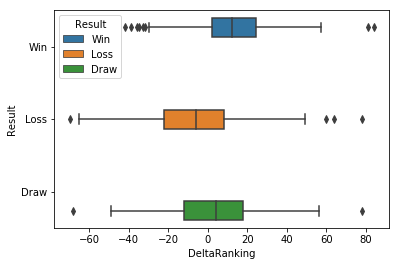

In [34]:
#Out of all variables ranking has a significant effect. 
display(sns.boxplot(x="DeltaRanking", y="Result", hue="Result", data=df_worldcup))

<center><img style="align: center;"  src="https://raw.githubusercontent.com/lrojasmendoza/GraduateProjectE29/master/Images/Slide10.JPG"> </center

In [35]:
#Let's start by importing train_test_split and some metrics. 
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

C:\Users\lmendoza\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Features and test/train sets

In [36]:
#Let's now define our features. We will use the same features for all models. 
features=['DeltaRanking',
          'Delta_win_percentage',
          'Delta_draw_percentage',
          'Delta_win_draw_home_team','Delta_win_draw_visitor_team',
           'Phase', 'Win_percentage_home_team','Win_percentage_visitor_team',
           'Draw_percentage_home_team','Draw_percentage_visitor_team',
           'Ranking_home_team','Ranking_visitor_team']

# X will include the independent variables.
X = df_worldcup[features]
# X will include the dependent variable. 
y = df_worldcup['Result']

#Finally let's split the data in test and train sets.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 42, stratify = y)



In [37]:
#Before we start training our models let's display the number of occurences of each result in our data set.
display(df_worldcup['Result'].value_counts())

print('Frequencies:')
display(round(df_worldcup['Result'].value_counts()*100/df_worldcup['Result'].value_counts().sum(),2))


Win     160
Loss    116
Draw     89
Name: Result, dtype: int64

Frequencies:


Win     43.84
Loss    31.78
Draw    24.38
Name: Result, dtype: float64

The data above can be used as a benchmark to our models.  If we predicted all games to be a 'win', then we would achieve an accuracy ~44% and a precision for the label 'Win' of ~44%.

# Knn Neighbors 

In [38]:
from sklearn.neighbors import KNeighborsClassifier

#CREATE AN INSTANCE OF THE CLASSIFIER WITH k = n
knn = KNeighborsClassifier(n_neighbors=24)
knn.fit(X_train,y_train)
y_predictions_knn = knn.predict(X_test)


In [39]:
#LET'S SEE IF OUR PREDICTIONS WERE ACCURATE
print("Accuracy: {0:.0f}%".format(knn.score(X_test, y_test) * 100))
cm=confusion_matrix(y_test, y_predictions_knn)

#Let's create a function to plot the confusion matrix using seaborn
def confusion_matrix_plot(cm):
    ax= sns.heatmap(cm, annot=True, fmt="d")
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['Draw', 'Loss','Win'])
    ax.yaxis.set_ticklabels(['Draw', 'Loss','Win'])
    return ax

Accuracy: 58%


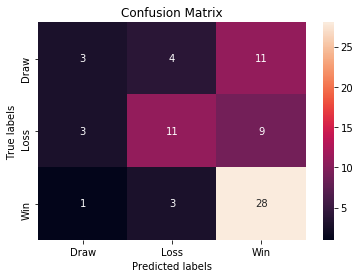

In [40]:
confusion_matrix_plot(cm)


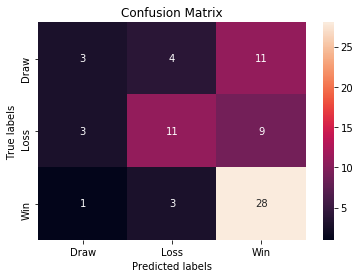

In [41]:
#Let's display the matrix one more time (I needed to do this so I could show the matrix in two different slides during the RISE
#Presentation. sorry! )
confusion_matrix_plot(cm)


In [42]:
print(classification_report(y_test, y_predictions_knn))


             precision    recall  f1-score   support

       Draw       0.43      0.17      0.24        18
       Loss       0.61      0.48      0.54        23
        Win       0.58      0.88      0.70        32

avg / total       0.55      0.58      0.54        73



1) In terms of accuracy, the model is better than predicting all labels as 'wins'

2) Regarding the confusion matrix and the classification report, our model has a significant number of FP for the label 'Win', meaning that a number games that should be labeled as 'Loss' or 'Draw' are being labeled as 'Win'. Having a significant number of FP hurts the overall precision of the model.  

3)On the other hand, the recall for the label 'win' is 88%, which can be explained by the low number of FN. This is, the majority of the games that should be labeled as 'win' are being labeled correctly. Overall, this model tends to overpredict the number of wins for the home teams, in particular for games that should be given the label 'Draw'.

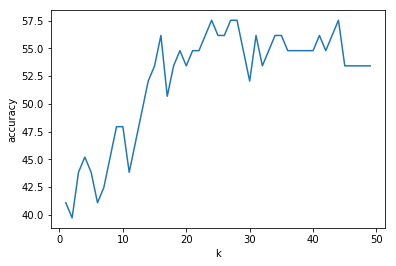

In [43]:
#The optimun number of neigbbors was determined through the following routine:
knn_list = range(1, 50)
accuracy_scores = []


for k in knn_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    accuracy_scores.append(knn.score(X_test, y_test) * 100)
   

plt.plot(knn_list, accuracy_scores)
plt.xlabel('k')
plt.ylabel('accuracy')

# Decision Tree Classifier

Accuracy: 56%


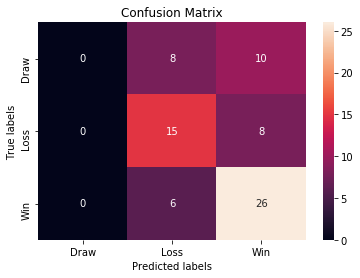

In [44]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth=1, random_state=7)
classifier = classifier.fit(X_train, y_train)
y_predictions_dt = classifier.predict(X_test)

print("Accuracy: {0:.0f}%".format(classifier.score(X_test, y_test) * 100))
cm=confusion_matrix(y_test, y_predictions_dt)
confusion_matrix_plot(cm)


In [45]:

print(classification_report(y_test, y_predictions_dt))

             precision    recall  f1-score   support

       Draw       0.00      0.00      0.00        18
       Loss       0.52      0.65      0.58        23
        Win       0.59      0.81      0.68        32

avg / total       0.42      0.56      0.48        73



C:\Users\lmendoza\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Something interesting about this model is the fact that the outcome of all games is being predicted as either a Win or a Loss. This is, no games are being labeled as a 'draw'. 

Something positive for this model is the fact that the recall for the label 'Loss' was improved, meaning that the number of FN for this particular label was smaller than for the Knn model. 

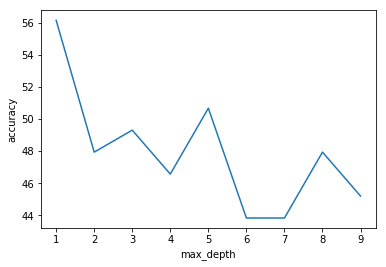

In [46]:
#The optimum max_depth was determined through the following routine:
max_depth_range = range(1, 10)
accuracy_scores = []


for depth in max_depth_range:
    classifier = DecisionTreeClassifier(max_depth=depth)
    classifier = classifier.fit(X_train, y_train)
    accuracy_scores.append(classifier.score(X_test, y_test) * 100)
    

plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('accuracy')

# Random Forest Classifier 



"A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True (default)"

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Accuracy: 59%


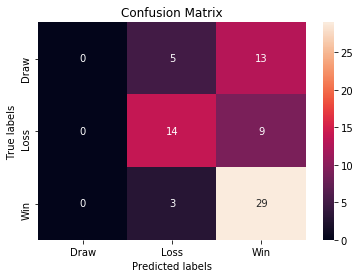

In [47]:
from sklearn.ensemble import RandomForestClassifier


classifier_2 = RandomForestClassifier(max_depth=4, min_samples_leaf=20, random_state=7)
classifier_2 = classifier_2.fit(X_train, y_train)
y_predictions_rnd = classifier_2.predict(X_test)

print("Accuracy: {0:.0f}%".format(classifier_2.score(X_test, y_test) * 100))
cm=confusion_matrix(y_test, y_predictions_rnd)
confusion_matrix_plot(cm)


In [48]:
print(classification_report(y_test, y_predictions_rnd))

             precision    recall  f1-score   support

       Draw       0.00      0.00      0.00        18
       Loss       0.64      0.61      0.62        23
        Win       0.57      0.91      0.70        32

avg / total       0.45      0.59      0.50        73



C:\Users\lmendoza\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


This model performs slighly better than Knn and that Decision Tree. However, as observed for the Decision Tree model, no games are being given the label 'Draw'

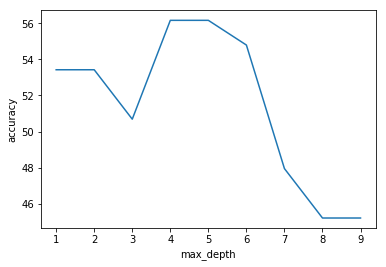

In [49]:
#The optimum max_depth was determined through the following routine:
max_depth_range = range(1, 10)
accuracy_scores = []


for depth in max_depth_range:
    classifier_2 = RandomForestClassifier(max_depth=depth, random_state=7)
    classifier_2 = classifier_2.fit(X_train, y_train)
    accuracy_scores.append(classifier_2.score(X_test, y_test) * 100)


plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('accuracy')

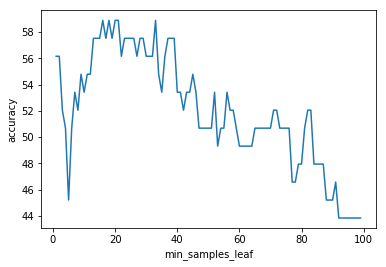

In [50]:
#The optimum min_samples_leaf was determined through the following routine:
min_samples_leaf_range = range(1, 100)
accuracy_scores = []

for leaf in min_samples_leaf_range:
    classifier_2 = RandomForestClassifier(max_depth=4, min_samples_leaf=leaf,random_state=7)
    classifier_2 = classifier_2.fit(X_train, y_train)
    accuracy_scores.append(classifier_2.score(X_test, y_test) * 100)


plt.plot(min_samples_leaf_range, accuracy_scores)
plt.xlabel('min_samples_leaf')
plt.ylabel('accuracy')


# Logistic Regression

Accuracy: 54.8%


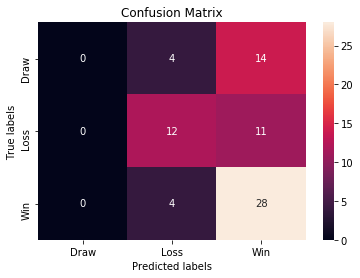

In [51]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

y_predictions_log = model.predict(X_test)

print("Accuracy: {0:.1f}%".format(model.score(X_test, y_test) * 100))

cm=confusion_matrix(y_test, y_predictions_log)
confusion_matrix_plot(cm)


In [52]:
print(classification_report(y_test, y_predictions_log))

             precision    recall  f1-score   support

       Draw       0.00      0.00      0.00        18
       Loss       0.60      0.52      0.56        23
        Win       0.53      0.88      0.66        32

avg / total       0.42      0.55      0.46        73



C:\Users\lmendoza\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Voting classifier. Wisdom of the crowd?

* Finally, let's see if we can use the wisdom of the crowd to obtain a better model.
* For doing so we will be using a weighted majority rule ensembling classifier (voting classifier)
* The setting parameter is set to 'hard' meaning that the predicted class (label :'Win', 'Loss",'Draw') will be assigned based on the class with the highest probability among all models.


* For example, if model A predicts class-Win with a probability a, and model B predicts class-Draw with a probability b, and a>b then the voting classifier will output the class with the highest porbability (class-Win)

In [53]:
#The following lines of code are based on code provided in Lecture 12, E29, spring 2018.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

knn_clf=  KNeighborsClassifier(n_neighbors=24)
rnd_clf = RandomForestClassifier(max_depth=4, min_samples_leaf=20,random_state=7)
voting_clf = VotingClassifier(estimators = [('kn', knn_clf),
                                            ('rf', rnd_clf)],
                                             voting = 'hard' )
voting_clf.fit(X_train,y_train)

for clf in (knn_clf, rnd_clf, voting_clf):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print (clf.__class__.__name__,accuracy_score(y_test, y_pred))


KNeighborsClassifier 0.575342465753
RandomForestClassifier 0.58904109589
VotingClassifier 0.616438356164


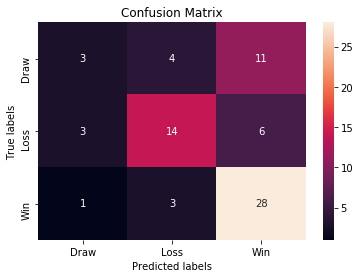

In [54]:
#Finally, let's get the classification report and confusion matrix for our voting classifier.
y_predictions_voting = voting_clf.predict(X_test)
cm=confusion_matrix(y_test, y_predictions_voting)
confusion_matrix_plot(cm)


In [55]:
print(classification_report(y_test, y_predictions_voting))

             precision    recall  f1-score   support

       Draw       0.43      0.17      0.24        18
       Loss       0.67      0.61      0.64        23
        Win       0.62      0.88      0.73        32

avg / total       0.59      0.62      0.58        73



<center><img style="align: center;"  src="https://raw.githubusercontent.com/lrojasmendoza/GraduateProjectE29/master/Images/Slide11.JPG"> </center

# Worldcup Russia  2018

It is now time to predict the winner of the worldcup!. For doing so we will follow the next steps:

* First we will use beautifulsoup to scrape the match information for the groups stage of the 2018 FIFA worldcup
* Then we will create features for all the matches occurring in the groups phase.
* Then we will predict the winners of each match during the groups phase. The best two teams in each group will make it to the next phase, which is called 'round of 16'. 
* Then, we will repeat the same process for the round of 16 matches, the quarter finals, the semifinals and finally for the final.



* It is important to keep in mind that Draws are only allowed to occur at the groups stage. Any draws later into the competition will have to be resolved via penalties. In the event of a draw we will have to toss a coin in order to decide the winner. Future work for this project may include the engineering of new features to determine the winner in the event of a draw. 

In [56]:
#It is time to apply our model and to predict the outcome of the 2018 worldcup.
#Let's start by obtaining the matches information from the FIFA website
page = requests.get("http://www.fifa.com/worldcup/matches/")
soup = BeautifulSoup(page.content, 'html.parser')
matches=soup.find_all(class_="fi-mu fixture")

overall_results=[]
for match in matches:
        results = {}
        results['Team_home']=list(match.find_all(class_='fi-t__nText'))[0].getText()
        results['Team_visitor']=list(match.find_all(class_='fi-t__nText'))[1].getText()
        results['Phase']=match.find(class_='fi__info__group').getText()
    
        overall_results.append(results)

worldcup_games_2018= pd.DataFrame(overall_results) 
worldcup_games_2018['Date']=2018
worldcup_games_2018['World_Cup']='Russia2018'
worldcup_games_2018=worldcup_games_2018[worldcup_games_2018['Phase']!=""]

In [57]:
#let's take a look at our dataframe worldcup_games_2018
worldcup_games_2018


,Phase,Team_home,Team_visitor,Date,World_Cup
0,Group A,Russia,Saudi Arabia,2018,Russia2018
1,Group A,Egypt,Uruguay,2018,Russia2018
2,Group B,Morocco,IR Iran,2018,Russia2018
3,Group B,Portugal,Spain,2018,Russia2018
4,Group C,France,Australia,2018,Russia2018
5,Group D,Argentina,Iceland,2018,Russia2018
6,Group C,Peru,Denmark,2018,Russia2018
7,Group D,Croatia,Nigeria,2018,Russia2018
8,Group E,Costa Rica,Serbia,2018,Russia2018
9,Group F,Germany,Mexico,2018,Russia2018


We will be using the following routine several times so let's save some space and make it into a function. This is the same routine we used to generate features for the groups phase. There's only one minor difference and it is the way we extract the year of the game from the dataframe. 

In [58]:
def create_features_worldcup(df,phase):
    """
    Given a dataframe, returns a new dataframe including new engineered features.
    @param df : dataframe. 
    @param phase : phase, 0 for groups phase, 1 for round of 16 and 2 for quarter finals, seminfinals, final and third place 
    @returns a dataframe. 
    """
    
    list_worldcup= []

    for _, row in df.iterrows():
        worldcup_dict={}

        date=row['Date']   
        home_team=row['Team_home']
        visitor_team=row['Team_visitor']

        rankings=get_rankings(hist_data,home_team,visitor_team,date,1)
        win_draw_percentages=win_draw_percentage(hist_data,home_team,visitor_team,date,1)

        worldcup_dict['Date']=row['Date']
        worldcup_dict['Team_home']=home_team
        worldcup_dict['Team_visitor']=visitor_team

        worldcup_dict['Ranking_home_team']=rankings['ranking_home_team']
        worldcup_dict['Ranking_visitor_team']=rankings['ranking_visitor_team']


        worldcup_dict['Win_percentage_home_team']=win_draw_percentages['win_percentage_home_team']
        worldcup_dict['Win_percentage_visitor_team']=win_draw_percentages['win_percentage_visitor_team']
        worldcup_dict['Delta_win_percentage']=win_draw_percentages['delta_win_percentage']

        worldcup_dict['Draw_percentage_home_team']=win_draw_percentages['draw_percentage_home_team']
        worldcup_dict['Draw_percentage_visitor_team']=win_draw_percentages['draw_percentage_visitor_team']
        worldcup_dict['Delta_draw_percentage']=win_draw_percentages['delta_draw_percentage']

        worldcup_dict['Delta_win_draw_home_team']=win_draw_percentages['delta_win_draw_home_team']
        worldcup_dict['Delta_win_draw_visitor_team']=win_draw_percentages['delta_win_draw_visitor_team']



        worldcup_dict['Worldcup']=row['World_Cup']
        worldcup_dict['Phase']=phase
        worldcup_dict['DeltaRanking']=(rankings['ranking_visitor_team']-rankings['ranking_home_team'])
        list_worldcup.append(worldcup_dict)
                
    df_worldcup = pd.DataFrame(list_worldcup)
    return df_worldcup
        


In [59]:
#Let's create the features for the groups phase
worldcup_2018 = create_features_worldcup(worldcup_games_2018,0)
worldcup_2018.to_csv('worldcup_2018_features180501.csv')
worldcup_2018 


,Date,DeltaRanking,Delta_draw_percentage,Delta_win_draw_home_team,Delta_win_draw_visitor_team,Delta_win_percentage,Draw_percentage_home_team,Draw_percentage_visitor_team,Phase,Ranking_home_team,Ranking_visitor_team,Team_home,Team_visitor,Win_percentage_home_team,Win_percentage_visitor_team,Worldcup
0,2018,-1.0,0.196970,-0.090909,0.250000,-0.143939,0.363636,0.166667,0,64.0,63.0,Russia,Saudi Arabia,0.272727,0.416667,Russia2018
1,2018,-10.0,-0.033333,0.200000,-0.100000,0.266667,0.266667,0.300000,0,31.0,21.0,Egypt,Uruguay,0.466667,0.200000,Russia2018
2,2018,-8.0,-0.139394,0.466667,0.363636,-0.036364,0.133333,0.272727,0,40.0,32.0,Morocco,IR Iran,0.600000,0.636364,Russia2018
3,2018,3.0,0.000000,0.533333,0.600000,-0.066667,0.200000,0.200000,0,3.0,6.0,Portugal,Spain,0.733333,0.800000,Russia2018
4,2018,29.0,-0.202797,0.454545,0.000000,0.251748,0.181818,0.384615,0,9.0,38.0,France,Australia,0.636364,0.384615,Russia2018
5,2018,18.0,0.216667,0.200000,0.500000,-0.083333,0.300000,0.083333,0,4.0,22.0,Argentina,Iceland,0.500000,0.583333,Russia2018
6,2018,1.0,-0.044444,0.200000,0.111111,0.044444,0.400000,0.444444,0,11.0,12.0,Peru,Denmark,0.600000,0.555556,Russia2018
7,2018,34.0,0.111111,0.083333,0.222222,-0.027778,0.333333,0.222222,0,17.0,51.0,Croatia,Nigeria,0.416667,0.444444,Russia2018
8,2018,10.0,0.087719,-0.157895,0.222222,-0.292398,0.421053,0.333333,0,26.0,36.0,Costa Rica,Serbia,0.263158,0.555556,Russia2018
9,2018,15.0,0.066667,0.466667,0.400000,0.133333,0.266667,0.200000,0,1.0,16.0,Germany,Mexico,0.733333,0.600000,Russia2018


In [60]:
#The next step is to make predictions for each game in the groups phase.

#These are the features
features=['DeltaRanking','Delta_win_percentage',
          'Delta_draw_percentage','Delta_win_draw_home_team','Delta_win_draw_visitor_team',
           'Phase', 'Win_percentage_home_team','Win_percentage_visitor_team',
           'Draw_percentage_home_team','Draw_percentage_visitor_team','Ranking_home_team','Ranking_visitor_team']

#There are our responses
X_groups_phase = worldcup_2018[features]

#let's predict the outcome using voting_clf
predictions_2018_groups_phase = voting_clf.predict(X_groups_phase)
predictions_2018_groups_phase


array(['Loss', 'Win', 'Loss', 'Win', 'Win', 'Win', 'Win', 'Win', 'Draw',
       'Win', 'Win', 'Win', 'Win', 'Draw', 'Win', 'Win', 'Loss', 'Win',
       'Win', 'Loss', 'Win', 'Win', 'Win', 'Win', 'Loss', 'Loss', 'Win',
       'Loss', 'Win', 'Win', 'Loss', 'Win', 'Win', 'Loss', 'Win', 'Loss',
       'Draw', 'Loss', 'Loss', 'Loss', 'Win', 'Loss', 'Loss', 'Win',
       'Loss', 'Draw', 'Loss', 'Loss'], dtype=object)

In [61]:
#Finally let's add a column with the resul for each game in the groups phase. 
worldcup_games_2018['Result']=predictions_2018_groups_phase

#Let's display the value counts for the column 'Result' and the new dataframe. 
display(worldcup_games_2018['Result'].value_counts())


Win     26
Loss    18
Draw     4
Name: Result, dtype: int64

In [82]:
worldcup_games_2018


,Phase,Team_home,Team_visitor,Date,World_Cup,Result,Home_points,Visitor_points
0,Group A,Russia,Saudi Arabia,2018,Russia2018,Loss,0,3
1,Group A,Egypt,Uruguay,2018,Russia2018,Win,3,0
2,Group B,Morocco,IR Iran,2018,Russia2018,Loss,0,3
3,Group B,Portugal,Spain,2018,Russia2018,Win,3,0
4,Group C,France,Australia,2018,Russia2018,Win,3,0
5,Group D,Argentina,Iceland,2018,Russia2018,Win,3,0
6,Group C,Peru,Denmark,2018,Russia2018,Win,3,0
7,Group D,Croatia,Nigeria,2018,Russia2018,Win,3,0
8,Group E,Costa Rica,Serbia,2018,Russia2018,Draw,1,1
9,Group F,Germany,Mexico,2018,Russia2018,Win,3,0


We must now assign points to each team based on the outcome of each games:
* 3 points for a win
* 1 point for a draw
* 0 points for a loss 

In [63]:
#Let's assign points to each team based on the outcome
worldcup_games_2018['Home_points'] = worldcup_games_2018['Result'].map({'Win':3,'Draw':1,
                                         'Loss':0})
worldcup_games_2018['Visitor_points'] = worldcup_games_2018['Result'].map({'Win':0,'Draw':1,
                                         'Loss':3})
worldcup_games_2018.head()

,Phase,Team_home,Team_visitor,Date,World_Cup,Result,Home_points,Visitor_points
0,Group A,Russia,Saudi Arabia,2018,Russia2018,Loss,0,3
1,Group A,Egypt,Uruguay,2018,Russia2018,Win,3,0
2,Group B,Morocco,IR Iran,2018,Russia2018,Loss,0,3
3,Group B,Portugal,Spain,2018,Russia2018,Win,3,0
4,Group C,France,Australia,2018,Russia2018,Win,3,0


In [64]:
#Let's start by determining how many points each team has after the groups phase
scores={}
for _, row in worldcup_games_2018.iterrows():
        
    if row['Team_home'] not in scores:
        scores[row['Team_home']]=0
    
    if row['Team_visitor'] not in scores:
        scores[row['Team_visitor']]=0
    
    if row['Result']=='Win':
        scores[row['Team_home']]+=3
    elif row['Result']=='Draw':
        scores[row['Team_home']]+=1
        scores[row['Team_visitor']]+=1
    else: 
        scores[row['Team_visitor']]+=3
        
print(scores)    


{'Russia': 0, 'Saudi Arabia': 3, 'Egypt': 9, 'Uruguay': 6, 'Morocco': 0, 'IR Iran': 3, 'Portugal': 9, 'Spain': 6, 'France': 7, 'Australia': 0, 'Argentina': 9, 'Iceland': 3, 'Peru': 6, 'Denmark': 4, 'Croatia': 6, 'Nigeria': 0, 'Costa Rica': 1, 'Serbia': 1, 'Germany': 9, 'Mexico': 6, 'Brazil': 9, 'Switzerland': 6, 'Sweden': 3, 'Korea Republic': 0, 'Belgium': 9, 'Panama': 0, 'Tunisia': 4, 'England': 4, 'Colombia': 4, 'Japan': 0, 'Poland': 9, 'Senegal': 4}


In [65]:
#It's time now to find the best two teams within each group.

#Let's start by making a copy of our worldcup_games_2018 dataframe:
groups_phase_results=worldcup_games_2018.copy()

#Let's select only the columns phase and Team_home.
#All teams plaued at least a game as Team_home and and as Visitor Team, and therefore we can have
#all the teams by only selecting the column Team_home
groups_phase_results=groups_phase_results[['Phase','Team_home']]
groups_phase_results.rename(columns={'Team_home':'Team'}, inplace=True)

#Now we can drop duplicates. 
groups_phase_results=groups_phase_results.drop_duplicates(subset=['Team'], keep='first').reset_index(drop=True)

#Finally we can assign the toatl points by using a lambda function that maps each country to the total points
#after the groups phase. For doing so we use the dictionary 'scores'
groups_phase_results['Points']=groups_phase_results.loc[:,'Team'].apply(lambda x: scores[x])

#Finally, we sort the data by Phase and points and we reset the index
groups_phase_results_sorted=groups_phase_results.sort_values(['Phase', 'Points'], ascending=[True, False]).reset_index(drop=True)
for group in groups_phase_results_sorted['Phase'].unique():
    display(groups_phase_results_sorted[groups_phase_results_sorted['Phase']==group])

,Phase,Team,Points
0,Group A,Egypt,9
1,Group A,Uruguay,6
2,Group A,Saudi Arabia,3
3,Group A,Russia,0


,Phase,Team,Points
4,Group B,Portugal,9
5,Group B,Spain,6
6,Group B,IR Iran,3
7,Group B,Morocco,0


,Phase,Team,Points
8,Group C,France,7
9,Group C,Peru,6
10,Group C,Denmark,4
11,Group C,Australia,0


,Phase,Team,Points
12,Group D,Argentina,9
13,Group D,Croatia,6
14,Group D,Iceland,3
15,Group D,Nigeria,0


,Phase,Team,Points
16,Group E,Brazil,9
17,Group E,Switzerland,6
18,Group E,Costa Rica,1
19,Group E,Serbia,1


,Phase,Team,Points
20,Group F,Germany,9
21,Group F,Mexico,6
22,Group F,Sweden,3
23,Group F,Korea Republic,0


,Phase,Team,Points
24,Group G,Belgium,9
25,Group G,Tunisia,4
26,Group G,England,4
27,Group G,Panama,0


,Phase,Team,Points
28,Group H,Poland,9
29,Group H,Colombia,4
30,Group H,Senegal,4
31,Group H,Japan,0


<center><img style="align: center;"  src="https://raw.githubusercontent.com/lrojasmendoza/GraduateProjectE29/master/Images/Slide12.JPG"> </center

<center><img style="align: center;"  src="https://raw.githubusercontent.com/lrojasmendoza/GraduateProjectE29/master/Images/Slide13_.JPG"> </center

## Round of 16
The best two teams in each group will make it to the round of 16 phase!

In [66]:
#Let's get the firts and second team within each group
A1=groups_phase_results_sorted[groups_phase_results_sorted['Phase']=='Group A']['Team'].iloc[0]
A2=groups_phase_results_sorted[groups_phase_results_sorted['Phase']=='Group A']['Team'].iloc[1]
B1=groups_phase_results_sorted[groups_phase_results_sorted['Phase']=='Group B']['Team'].iloc[0]
B2=groups_phase_results_sorted[groups_phase_results_sorted['Phase']=='Group B']['Team'].iloc[1]
C1=groups_phase_results_sorted[groups_phase_results_sorted['Phase']=='Group C']['Team'].iloc[0]
C2=groups_phase_results_sorted[groups_phase_results_sorted['Phase']=='Group C']['Team'].iloc[1]
D1=groups_phase_results_sorted[groups_phase_results_sorted['Phase']=='Group D']['Team'].iloc[0]
D2=groups_phase_results_sorted[groups_phase_results_sorted['Phase']=='Group D']['Team'].iloc[1]
E1=groups_phase_results_sorted[groups_phase_results_sorted['Phase']=='Group E']['Team'].iloc[0]
E2=groups_phase_results_sorted[groups_phase_results_sorted['Phase']=='Group E']['Team'].iloc[1]
F1=groups_phase_results_sorted[groups_phase_results_sorted['Phase']=='Group F']['Team'].iloc[0]
F2=groups_phase_results_sorted[groups_phase_results_sorted['Phase']=='Group F']['Team'].iloc[1]
G1=groups_phase_results_sorted[groups_phase_results_sorted['Phase']=='Group G']['Team'].iloc[0]
G2=groups_phase_results_sorted[groups_phase_results_sorted['Phase']=='Group G']['Team'].iloc[1]
H1=groups_phase_results_sorted[groups_phase_results_sorted['Phase']=='Group H']['Team'].iloc[0]
H2=groups_phase_results_sorted[groups_phase_results_sorted['Phase']=='Group H']['Team'].iloc[1]


#Finally let's create a new dataframe containing the information for the matches of the round of 16.
home_team_16=[A1, C1,E1,G1,B1, D1,F1,H1]
visitor_team_16=[B2, D2,F2,H2,A2, C2,E2,G2]
game=['A1-B2','C1-D2','E1-F2','G1-H2','B1-A2','D1-C2','F1-E2','H1-G2']


#let's create a dataframe
round_of_16 = pd.DataFrame({'Team_home' : home_team_16,'Team_visitor' : visitor_team_16, 'Key':game})
round_of_16['Date']=2018
round_of_16['World_Cup']='Russia2018'

display(round_of_16)

,Key,Team_home,Team_visitor,Date,World_Cup
0,A1-B2,Egypt,Spain,2018,Russia2018
1,C1-D2,France,Croatia,2018,Russia2018
2,E1-F2,Brazil,Mexico,2018,Russia2018
3,G1-H2,Belgium,Colombia,2018,Russia2018
4,B1-A2,Portugal,Uruguay,2018,Russia2018
5,D1-C2,Argentina,Peru,2018,Russia2018
6,F1-E2,Germany,Switzerland,2018,Russia2018
7,H1-G2,Poland,Tunisia,2018,Russia2018


In [67]:
#Let's now generate the features for the voting model. 
round_of_16_2018 = create_features_worldcup(round_of_16,1)
round_of_16_2018.to_csv('round_of_16_worldcup_2018_features180501.csv')
round_of_16_2018


,Date,DeltaRanking,Delta_draw_percentage,Delta_win_draw_home_team,Delta_win_draw_visitor_team,Delta_win_percentage,Draw_percentage_home_team,Draw_percentage_visitor_team,Phase,Ranking_home_team,Ranking_visitor_team,Team_home,Team_visitor,Win_percentage_home_team,Win_percentage_visitor_team,Worldcup
0,2018,-25.0,0.066667,0.200000,0.600000,-0.333333,0.266667,0.200000,1,31.0,6.0,Egypt,Spain,0.466667,0.800000,Russia2018
1,2018,8.0,-0.151515,0.454545,0.083333,0.219697,0.181818,0.333333,1,9.0,17.0,France,Croatia,0.636364,0.416667,Russia2018
2,2018,14.0,0.072727,0.363636,0.400000,0.036364,0.272727,0.200000,1,2.0,16.0,Brazil,Mexico,0.636364,0.600000,Russia2018
3,2018,8.0,-0.030303,0.333333,0.000000,0.303030,0.333333,0.363636,1,5.0,13.0,Belgium,Colombia,0.666667,0.363636,Russia2018
4,2018,18.0,-0.100000,0.533333,-0.100000,0.533333,0.200000,0.300000,1,3.0,21.0,Portugal,Uruguay,0.733333,0.200000,Russia2018
5,2018,7.0,-0.100000,0.200000,0.200000,-0.100000,0.300000,0.400000,1,4.0,11.0,Argentina,Peru,0.500000,0.600000,Russia2018
6,2018,7.0,0.155556,0.466667,0.666667,-0.044444,0.266667,0.111111,1,1.0,8.0,Germany,Switzerland,0.733333,0.777778,Russia2018
7,2018,20.0,-0.028846,0.500000,0.307692,0.163462,0.125000,0.153846,1,7.0,27.0,Poland,Tunisia,0.625000,0.461538,Russia2018


In [68]:
#let's predict the outcome for each game 
features=['DeltaRanking','Delta_win_percentage', 'Delta_draw_percentage',
          'Delta_win_draw_home_team','Delta_win_draw_visitor_team', 'Phase', 'Win_percentage_home_team','Win_percentage_visitor_team',
           'Draw_percentage_home_team','Draw_percentage_visitor_team','Ranking_home_team','Ranking_visitor_team']
        
X_round_16 = round_of_16_2018[features]

predictions_2018_round_of_16_phase = voting_clf.predict(X_round_16)

round_of_16['Result']=predictions_2018_round_of_16_phase


In [69]:
#Here we can see the result for each match:
round_of_16


,Key,Team_home,Team_visitor,Date,World_Cup,Result
0,A1-B2,Egypt,Spain,2018,Russia2018,Loss
1,C1-D2,France,Croatia,2018,Russia2018,Win
2,E1-F2,Brazil,Mexico,2018,Russia2018,Win
3,G1-H2,Belgium,Colombia,2018,Russia2018,Win
4,B1-A2,Portugal,Uruguay,2018,Russia2018,Win
5,D1-C2,Argentina,Peru,2018,Russia2018,Win
6,F1-E2,Germany,Switzerland,2018,Russia2018,Win
7,H1-G2,Poland,Tunisia,2018,Russia2018,Win


<center><img style="align: center;"  src="https://raw.githubusercontent.com/lrojasmendoza/GraduateProjectE29/master/Images/Slide14_.JPG"> </center

## Quarter Finals 

* The winner of A1-B2 will play againts the winner of C1-D2
* The winner of E1-F2 will play againts the winner of G1-H2
* The winner of B1-A2 will play againts the winner of D1-C2
* The winner of F1-E2 will play againts the winner of H1-G2

In [70]:
#let's get the winners from the round of 16 dataframe

#We will store the winners of each game during the round of  16 stage in this list.
winners=[]

#We will iterate over the key's column and will determine which team was the winner of each game. 
for key in round_of_16['Key'].unique():
    if round_of_16[round_of_16['Key']==key]['Result'].iloc[0]=='Win':
        winners.append(round_of_16[round_of_16['Key']==key]['Team_home'].iloc[0])
    else:
        winners.append(round_of_16[round_of_16['Key']==key]['Team_visitor'].iloc[0])

#Let's now create a dataframe containing the games for the quarter finals             
home_team_Q=[winners[0], winners[2],winners[4],winners[6]]
visitor_team_Q=[winners[1], winners[3],winners[5],winners[7]]
game_Q=['Q1','Q2','Q3','Q4']

quarter_finals = pd.DataFrame({'Team_home' : home_team_Q,'Team_visitor' : visitor_team_Q, 'Key':game_Q})
quarter_finals['Date']=2018
quarter_finals['World_Cup']='Russia2018'

quarter_finals

,Key,Team_home,Team_visitor,Date,World_Cup
0,Q1,Spain,France,2018,Russia2018
1,Q2,Brazil,Belgium,2018,Russia2018
2,Q3,Portugal,Argentina,2018,Russia2018
3,Q4,Germany,Poland,2018,Russia2018


In [71]:
#let's now get the features for our quarter finals. 
quarter_finals_2018 = create_features_worldcup(quarter_finals,2)
quarter_finals_2018.to_csv('quarter_finals_worldcup_2018_features180501.csv')
quarter_finals_2018


,Date,DeltaRanking,Delta_draw_percentage,Delta_win_draw_home_team,Delta_win_draw_visitor_team,Delta_win_percentage,Draw_percentage_home_team,Draw_percentage_visitor_team,Phase,Ranking_home_team,Ranking_visitor_team,Team_home,Team_visitor,Win_percentage_home_team,Win_percentage_visitor_team,Worldcup
0,2018,3.0,0.018182,0.600000,0.454545,0.163636,0.200000,0.181818,2,6.0,9.0,Spain,France,0.800000,0.636364,Russia2018
1,2018,3.0,-0.060606,0.363636,0.333333,-0.030303,0.272727,0.333333,2,2.0,5.0,Brazil,Belgium,0.636364,0.666667,Russia2018
2,2018,1.0,-0.100000,0.533333,0.200000,0.233333,0.200000,0.300000,2,3.0,4.0,Portugal,Argentina,0.733333,0.500000,Russia2018
3,2018,6.0,0.141667,0.466667,0.500000,0.108333,0.266667,0.125000,2,1.0,7.0,Germany,Poland,0.733333,0.625000,Russia2018


In [72]:
#let's predict the outcome for each game 
features=['DeltaRanking',
          'Delta_win_percentage',
          'Delta_draw_percentage',
          'Delta_win_draw_home_team','Delta_win_draw_visitor_team',
           'Phase', 'Win_percentage_home_team','Win_percentage_visitor_team',
           'Draw_percentage_home_team','Draw_percentage_visitor_team',
           'Ranking_home_team','Ranking_visitor_team']
        
X_quarter_finals = quarter_finals_2018[features]

predictions_2018_quarter_finals_phase = voting_clf.predict(X_quarter_finals)

quarter_finals['Result']=predictions_2018_quarter_finals_phase


In [73]:
quarter_finals

,Key,Team_home,Team_visitor,Date,World_Cup,Result
0,Q1,Spain,France,2018,Russia2018,Win
1,Q2,Brazil,Belgium,2018,Russia2018,Win
2,Q3,Portugal,Argentina,2018,Russia2018,Win
3,Q4,Germany,Poland,2018,Russia2018,Win


<center><img style="align: center;"  src="https://raw.githubusercontent.com/lrojasmendoza/GraduateProjectE29/master/Images/Slide15_.JPG"> </center

## Semifinal 

In [74]:
#Let's find out which are the winners from the quarter finals.

winners_2=[]
for key in quarter_finals['Key'].unique():
    if quarter_finals[quarter_finals['Key']==key]['Result'].iloc[0]=='Win':
        winners_2.append(quarter_finals[quarter_finals['Key']==key]['Team_home'].iloc[0])
    else:
        winners_2.append(quarter_finals[quarter_finals['Key']==key]['Team_visitor'].iloc[0])

#Let's now create a dataframe containing the semifinal games.          
home_team_S=[winners_2[0], winners_2[2]]
visitor_team_S=[winners_2[1], winners_2[3]]
game_S=['S1','S2']

semifinals = pd.DataFrame({'Team_home' : home_team_S,'Team_visitor' : visitor_team_S, 'Key':game_S})
semifinals['Date']=2018
semifinals['World_Cup']='Russia2018'
semifinals


,Key,Team_home,Team_visitor,Date,World_Cup
0,S1,Spain,Brazil,2018,Russia2018
1,S2,Portugal,Germany,2018,Russia2018


In [75]:
#let's now get the features for the semifinals. 
semifinals_2018 = create_features_worldcup(semifinals,2)
semifinals_2018.to_csv('semifinals_worldcup_2018_features180501.csv')
semifinals_2018


,Date,DeltaRanking,Delta_draw_percentage,Delta_win_draw_home_team,Delta_win_draw_visitor_team,Delta_win_percentage,Draw_percentage_home_team,Draw_percentage_visitor_team,Phase,Ranking_home_team,Ranking_visitor_team,Team_home,Team_visitor,Win_percentage_home_team,Win_percentage_visitor_team,Worldcup
0,2018,-4.0,-0.072727,0.600000,0.363636,0.163636,0.2,0.272727,2,6.0,2.0,Spain,Brazil,0.800000,0.636364,Russia2018
1,2018,-2.0,-0.066667,0.533333,0.466667,0.000000,0.2,0.266667,2,3.0,1.0,Portugal,Germany,0.733333,0.733333,Russia2018


In [76]:
#let's predict the outcome for each game 
features=['DeltaRanking',
          'Delta_win_percentage',
          'Delta_draw_percentage',
          'Delta_win_draw_home_team','Delta_win_draw_visitor_team',
           'Phase', 'Win_percentage_home_team','Win_percentage_visitor_team',
           'Draw_percentage_home_team','Draw_percentage_visitor_team',
           'Ranking_home_team','Ranking_visitor_team']
        
X_semifinals = semifinals_2018[features]

predictions_2018_semifinals_phase = voting_clf.predict(X_semifinals)

semifinals['Result']=predictions_2018_semifinals_phase


In [77]:
semifinals

,Key,Team_home,Team_visitor,Date,World_Cup,Result
0,S1,Spain,Brazil,2018,Russia2018,Loss
1,S2,Portugal,Germany,2018,Russia2018,Win


<center><img style="align: center;"  src="https://raw.githubusercontent.com/lrojasmendoza/GraduateProjectE29/master/Images/Slide16_.JPG"> </center

##  And the winner is! 

In [78]:
#Let's find out what team wins the worldcup and the third place position!
winners_3=[]
for key in semifinals['Key'].unique():
    if semifinals[semifinals['Key']==key]['Result'].iloc[0]=='Win':
        winners_3.append(semifinals[semifinals['Key']==key]['Team_home'].iloc[0])
    else:
        winners_3.append(semifinals[semifinals['Key']==key]['Team_visitor'].iloc[0])
        
for key in semifinals['Key'].unique():
    if semifinals[semifinals['Key']==key]['Result'].iloc[0]=='Win':
        winners_3.append(semifinals[semifinals['Key']==key]['Team_visitor'].iloc[0])      
    else:
        winners_3.append(semifinals[semifinals['Key']==key]['Team_home'].iloc[0])
        
#Let's now create a dataframe containing the final and third-place games.             
home_team_F=[winners_3[0], winners_3[2]]
visitor_team_F=[winners_3[1],winners_3[3]]
game_F=['Final','3rd Place']

finals = pd.DataFrame({'Team_home' : home_team_F,'Team_visitor' : visitor_team_F, 'Key':game_F})
finals['Date']=2018
finals['World_Cup']='Russia2018'



In [79]:
finals


,Key,Team_home,Team_visitor,Date,World_Cup
0,Final,Brazil,Portugal,2018,Russia2018
1,3rd Place,Spain,Germany,2018,Russia2018


In [80]:
#let's now get the features for the final and the 3rd place match. 
finals_2018 = create_features_worldcup(finals,2)
finals_2018.to_csv('finals_worldcup_2018_features180501.csv')
finals_2018


,Date,DeltaRanking,Delta_draw_percentage,Delta_win_draw_home_team,Delta_win_draw_visitor_team,Delta_win_percentage,Draw_percentage_home_team,Draw_percentage_visitor_team,Phase,Ranking_home_team,Ranking_visitor_team,Team_home,Team_visitor,Win_percentage_home_team,Win_percentage_visitor_team,Worldcup
0,2018,1.0,0.072727,0.363636,0.533333,-0.096970,0.272727,0.200000,2,2.0,3.0,Brazil,Portugal,0.636364,0.733333,Russia2018
1,2018,-5.0,-0.066667,0.600000,0.466667,0.066667,0.200000,0.266667,2,6.0,1.0,Spain,Germany,0.800000,0.733333,Russia2018


In [81]:
#let's predict the outcome for each game 
features=['DeltaRanking',
          'Delta_win_percentage',
          'Delta_draw_percentage',
          'Delta_win_draw_home_team','Delta_win_draw_visitor_team',
           'Phase', 'Win_percentage_home_team','Win_percentage_visitor_team',
           'Draw_percentage_home_team','Draw_percentage_visitor_team',
           'Ranking_home_team','Ranking_visitor_team']
        
X_finals = finals_2018[features]

predictions_2018_final_phase = voting_clf.predict(X_finals)

finals['Result']=predictions_2018_final_phase
finals

,Key,Team_home,Team_visitor,Date,World_Cup,Result
0,Final,Brazil,Portugal,2018,Russia2018,Win
1,3rd Place,Spain,Germany,2018,Russia2018,Loss


<center><img style="align: center;"  src="https://raw.githubusercontent.com/lrojasmendoza/GraduateProjectE29/master/Images/Slide17_.JPG"> </center

<center><img style="align: center;"  src="https://raw.githubusercontent.com/lrojasmendoza/GraduateProjectE29/master/Images/conclusions.jpg"> </center

<center><img style="align: center;"  src="https://raw.githubusercontent.com/lrojasmendoza/GraduateProjectE29/master/Images/references.jpg"> </center